In [1]:
# Let's start importing the libraries we need for the project 
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from collections import Counter
from matplotlib import colors
import plotly.graph_objs as go
from plotly.offline import iplot
from plotly.subplots import make_subplots
from scipy import stats
from scipy.stats import norm, skew
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler 
from imblearn.under_sampling import RandomUnderSampler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import classification_report, roc_curve, auc, accuracy_score, f1_score
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LassoCV
from warnings import filterwarnings
filterwarnings("ignore")

In [2]:
# Let's read the second dataframe
df2 = pd.read_csv("PS_20174392719_1491204439457_log.csv")
df2.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [3]:
# Read the last rows
df2.tail()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0
6362619,743,CASH_OUT,850002.52,C1280323807,850002.52,0.0,C873221189,6510099.11,7360101.63,1,0


In [4]:
# Description of the dataset
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [5]:
# check for missing values
total = df2.isnull().sum().sort_values(ascending = False)
percent = (df2.isnull().sum()/df2.isnull().count()*100).sort_values(ascending = False)
pd.concat([total, percent], axis=1, keys=['Total', 'Percent']).transpose()

# there is no missing values in the dataset

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
Total,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Percent,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
# Identify the values for ==> type
df2["type"].unique()

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

In [7]:
# Identify the values for ==> type
df2["isFraud"].unique()

array([0, 1], dtype=int64)

In [8]:
# Identify the values for ==> nameDest
df2["nameDest"].unique()

array(['M1979787155', 'M2044282225', 'C553264065', ..., 'C1850423904',
       'C1881841831', 'C2080388513'], dtype=object)

In [9]:
# Identify the values for ==> nameOrig
df2["nameOrig"].unique()

array(['C1231006815', 'C1666544295', 'C1305486145', ..., 'C1162922333',
       'C1685995037', 'C1280323807'], dtype=object)

## DATA CONTENT
- This dataset contain 6362620 rows and 11 columns. From which we are goign to keep only the features with numeric values and relevant for our analysis.
- Step ==> Is the our when the transaction was made, this is from 1 to 743, which represents 31 days cosidered for the data collection 24 hours each day.
- type ==> Is referinf to the type of transaction made: 'PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'
- Amount ==> The maoun of the Transaction
- nameOrig ==> Is refering to the origen of the transaction, is a unic alphanumeric code asigned to each transaction.
- nameDest ==> Is refering to the Destination of the transaction, is a unic alphanumeric code asigned to each transaction.
- oldbalanceOrg ==> Represents the balance of the sender before made the transaction.
- newbalanceOrig ==> Represents the balance of the sender after made the transaction.
- newbalanceDest ==> Represents the balance of the receiber after made the transaction.
- oldbalanceDest==> Represents the balance of the receiber before made the transaction.
- isFrau | isFlaggedFraud ==> Represent the same value.

### Comments 
- On the first stage we are goign to drop the column "isFlaggedFraud", because contains the same value as the column "isFraud", sine that is our target variable, it's important to avoid duplicate data.

In [10]:
# Drop a column with duplicate values
df2 = df2.drop("isFlaggedFraud", axis=1)
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 10 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
dtypes: float64(5), int64(2), object(3)
memory usage: 485.4+ MB


In [11]:
# Reading the columns
df2.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud'],
      dtype='object')

In [12]:
# Explore data types
df2.dtypes

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
dtype: object

### Comments 
- If the first characters of nameOrig and nameDest are relevant, we will try to isolate them.

In [13]:
#Identify similarities between features to avoid over-fitting.
def returnFirstChar(name):
    return name[0]

df2['nameOrigF'] = df2['nameOrig'].apply(returnFirstChar)
df2['nameDestF'] = df2['nameDest'].apply(returnFirstChar)

In [14]:
# Droping the columns we don't need in our analysis 
df2 = df2.drop(columns=['nameOrig','nameDest','nameOrigF'])
# Let's update changes 
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 9 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   oldbalanceOrg   float64
 4   newbalanceOrig  float64
 5   oldbalanceDest  float64
 6   newbalanceDest  float64
 7   isFraud         int64  
 8   nameDestF       object 
dtypes: float64(5), int64(2), object(2)
memory usage: 436.9+ MB


# LABEL ENCODER
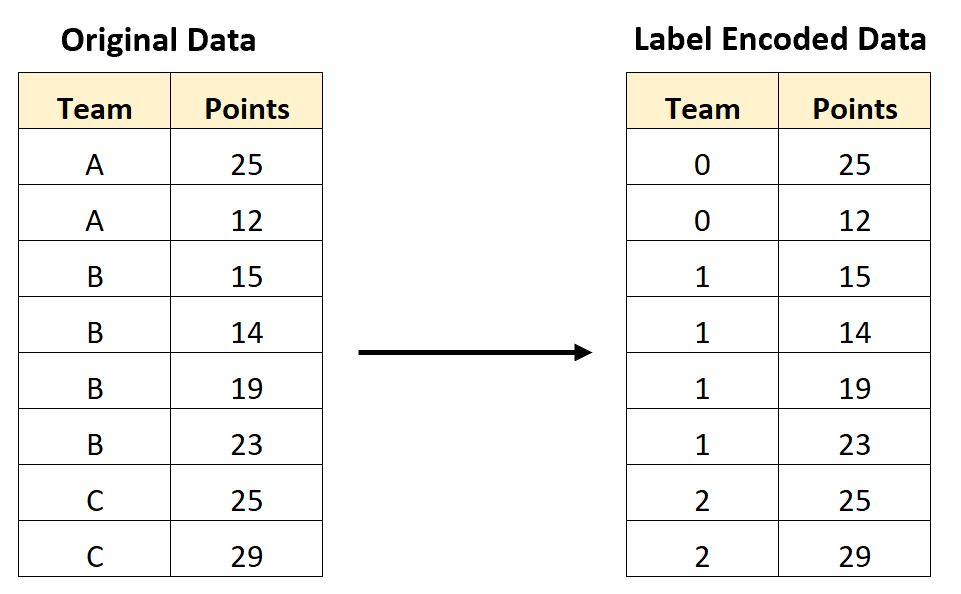

### Comments 
- Label encoding is useful for transforming categorical data into numerical format.

In [15]:
# Encoding the categorical features
for column in ['type', 'nameDestF']:
    encoder = LabelEncoder()
    df2[column] = encoder.fit_transform(df2[column])
    # Update data types
df2.dtypes

step                int64
type                int32
amount            float64
oldbalanceOrg     float64
newbalanceOrig    float64
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
nameDestF           int32
dtype: object

In [16]:
# let's convert all data to dtype == int64
df2 = df2.astype('int64')
df2.dtypes

step              int64
type              int64
amount            int64
oldbalanceOrg     int64
newbalanceOrig    int64
oldbalanceDest    int64
newbalanceDest    int64
isFraud           int64
nameDestF         int64
dtype: object

In [17]:
# Define constants
hours_in_day = 24

# Convert "step" values to days and hours
df2['days'] = (df2['step'] - 1) // hours_in_day + 1
df2['hours'] = (df2['step'] - 1) % hours_in_day

# Dropping the column transformed
df2 = df2.drop("step", axis=1)

# Now the 'days' column will contain the day of the month and the 'hours' column will contain the hour within that day,
print(df2[['days', 'hours']])
df2.dtypes

         days  hours
0           1      0
1           1      0
2           1      0
3           1      0
4           1      0
...       ...    ...
6362615    31     22
6362616    31     22
6362617    31     22
6362618    31     22
6362619    31     22

[6362620 rows x 2 columns]


type              int64
amount            int64
oldbalanceOrg     int64
newbalanceOrig    int64
oldbalanceDest    int64
newbalanceDest    int64
isFraud           int64
nameDestF         int64
days              int64
hours             int64
dtype: object

In [18]:
# Call the first rows
df2.head()

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,nameDestF,days,hours
0,3,9839,170136,160296,0,0,0,1,1,0
1,3,1864,21249,19384,0,0,0,1,1,0
2,4,181,181,0,0,0,1,0,1,0
3,1,181,181,0,21182,0,1,0,1,0
4,3,11668,41554,29885,0,0,0,1,1,0


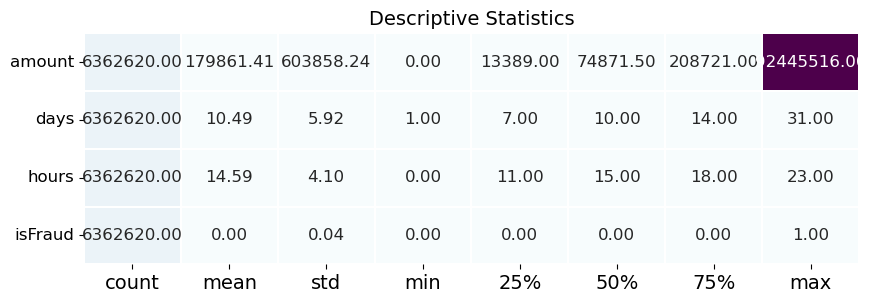

In [19]:
# statistical summary:
cols = df2[["amount","days","hours","isFraud"]]
cmap1 = 'BuPu'
def desc_stats(dataframe):
    desc = dataframe.describe().T
    f,ax = plt.subplots(figsize=(10,
                                 desc.shape[0] * 0.75))
    sns.heatmap(desc,
                annot = True,
                cmap = cmap1,
                fmt= '.2f',
                ax = ax,
                linecolor = 'white',
                linewidths = 1.3,
                cbar = False,
                annot_kws = {"size": 12})
    plt.xticks(size = 14)
    plt.yticks(size = 12,
               rotation = 0)
    plt.title("Descriptive Statistics", size = 14)
    plt.show()
    
desc_stats(cols)

In [20]:
# correlation matrix
corr = df2.corr()
corr.style.background_gradient(cmap='BuPu')

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,nameDestF,days,hours
type,1.000000,0.088419,-0.339760,-0.352758,-0.104679,-0.059364,0.020833,0.680754,0.005738,0.031429
amount,0.088419,1.000000,-0.002762,-0.007861,0.294137,0.459304,0.076688,-0.197444,0.023473,-0.036982
oldbalanceOrg,-0.339760,-0.002762,1.000000,0.998803,0.066242,0.042029,0.010154,-0.189486,-0.009940,-0.004628
newbalanceOrig,-0.352758,-0.007861,0.998803,1.000000,0.067812,0.041837,-0.008148,-0.193915,-0.010181,-0.004610
oldbalanceDest,-0.104679,0.294137,0.066242,0.067812,1.000000,0.976569,-0.005885,-0.231455,0.027878,-0.005966
newbalanceDest,-0.059364,0.459304,0.042029,0.041837,0.976569,1.000000,0.000535,-0.238315,0.026274,-0.012058
isFraud,0.020833,0.076688,0.010154,-0.008148,-0.005885,0.000535,1.000000,-0.025697,0.032425,-0.027781
nameDestF,0.680754,-0.197444,-0.189486,-0.193915,-0.231455,-0.238315,-0.025697,1.000000,0.003678,0.043505
days,0.005738,0.023473,-0.009940,-0.010181,0.027878,0.026274,0.032425,0.003678,1.000000,0.036459
hours,0.031429,-0.036982,-0.004628,-0.004610,-0.005966,-0.012058,-0.027781,0.043505,0.036459,1.000000


### Comments 
- Based on the correlation matrix the column hour represents a negative correlation, however in the previous analysis we could identify that hour, is a relevant feature for credit card fraud detenction, for this reason we are not going to drop columns untill we have a better insight of the values. 
- The columns oldbalanceOr with newbalanceOrig, and also oldbalanceDest with newbalanceDest represent high correlation features are more likely to be linearly related and have virtually the same influence on the dependent variable. As a result, when two characteristics have a strong correlation, we can drop one of them. The correlation heatmap of the original dataset and resampled dataset. 

In [21]:
# Drop columns with high correlation
df2 = df2.drop(columns=['newbalanceOrig','oldbalanceDest','nameDestF'])
# Let's update changes 
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 7 columns):
 #   Column          Dtype
---  ------          -----
 0   type            int64
 1   amount          int64
 2   oldbalanceOrg   int64
 3   newbalanceDest  int64
 4   isFraud         int64
 5   days            int64
 6   hours           int64
dtypes: int64(7)
memory usage: 339.8 MB


## DATA VISUALISATION

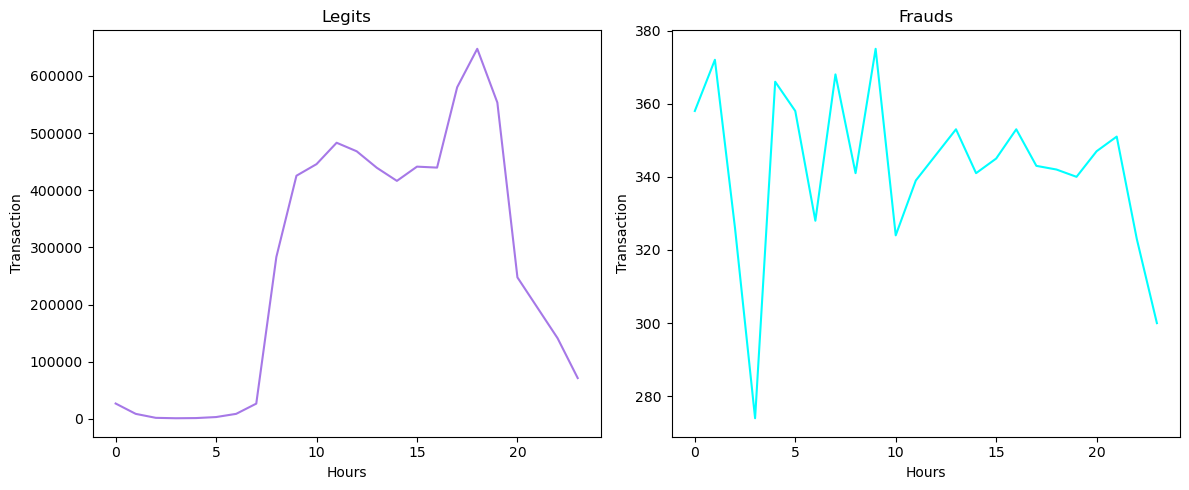

In [22]:
# Transaction count with non frauds over time (Hour)
count_0 = df2[df2['isFraud'] == 0].groupby('hours').count()["isFraud"]

# Transaction count with frauds over time (Hour)
count_1 = df2[df2['isFraud'] == 1].groupby('hours').count()["isFraud"]

# Create two separate subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Plot for Legits
ax1.plot(count_0.index, count_0.values, color="#A678E7")
ax1.set_title("Legits")
ax1.set_xlabel("Hours")
ax1.set_ylabel("Transaction")

# Plot for Frauds
ax2.plot(count_1.index, count_1.values, color="#00FFFF")
ax2.set_title("Frauds")
ax2.set_xlabel("Hours")
ax2.set_ylabel("Transaction")

plt.tight_layout()
plt.show()

### Comments
- As it presented previously in the correlation matrix, the plot shows similiarity, which means that hour is not really related with fraudalent transactions, could be for many reasons, and one them might be that it's a transformed feature, so we don't have the 100% of confidence that those transactions we exactly at that time.

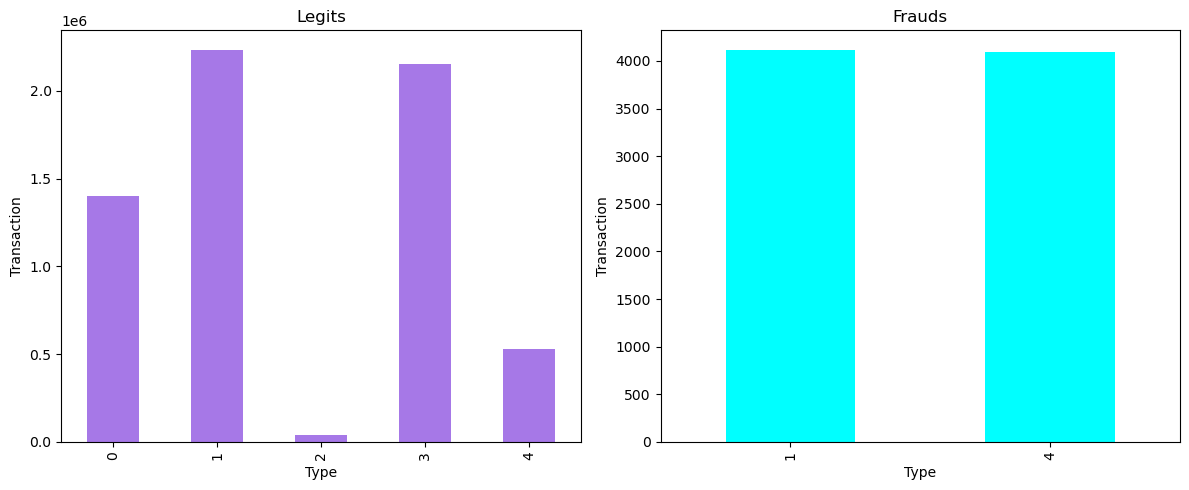

In [23]:
# Transaction count with non frauds over time (Hour)
count_0 = df2[df2['isFraud'] == 0].groupby('type').count()["isFraud"]

# Transaction count with frauds over time (Hour)
count_1 = df2[df2['isFraud'] == 1].groupby('type').count()["isFraud"]

# Create two separate subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Plot for Legits
count_0.plot(kind='bar', ax=ax1, color="#A678E7")
ax1.set_title("Legits")
ax1.set_xlabel("Type")
ax1.set_ylabel("Transaction")

# Plot for Frauds
count_1.plot(kind='bar', ax=ax2, color="#00FFFF")
ax2.set_title("Frauds")
ax2.set_xlabel("Type")
ax2.set_ylabel("Transaction")

plt.tight_layout()
plt.show()

### Comments 
- Int this graphic we can visualise an important value to detect fraud transactions, according to type column the fraud transactions are only present in the values 1 and 4 which means, TRANSFER and CASH_IN, which could be an import value to consider for oversampling.

- How much of the data are cases of fraud?

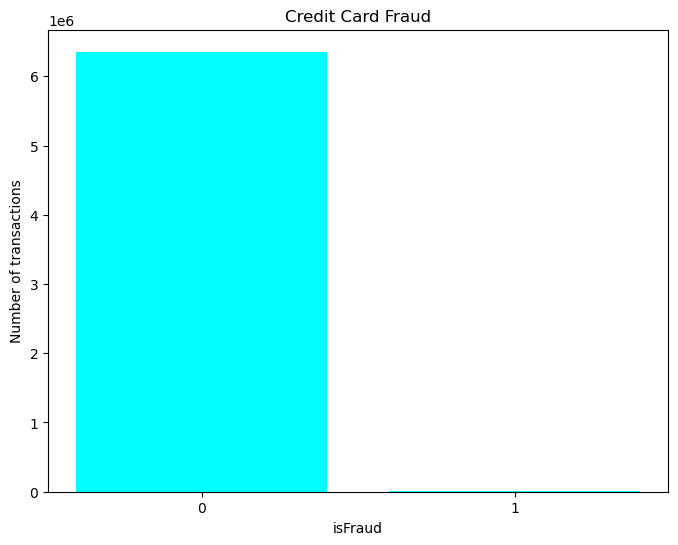

In [24]:
# Calculate class distribution
temp = df2["isFraud"].value_counts()
df_p = pd.DataFrame({'isFraud': temp.index, 'values': temp.values})

# Create a bar plot
plt.figure(figsize=(8, 6))
plt.bar(df_p['isFraud'], df_p['values'], color="#00FFFF")
plt.title('Credit Card Fraud')
plt.xlabel('isFraud')
plt.ylabel('Number of transactions')
plt.xticks(df_p['isFraud'])
plt.show()

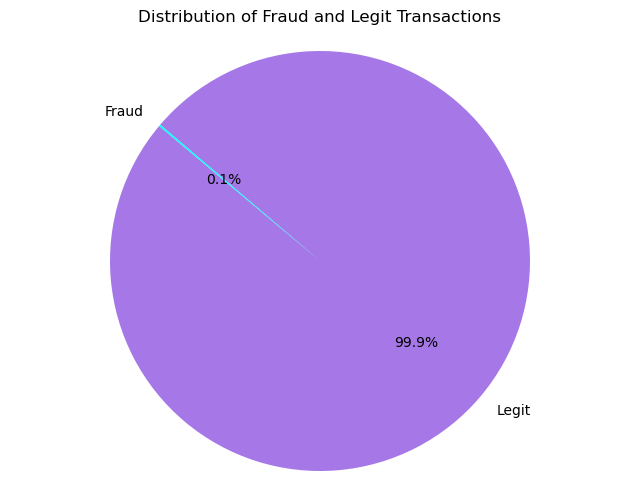

In [25]:
# Calculate the distribution of fraud and legit transactions
fraud_count = len(df2[df2['isFraud'] == 1])
legit_count = len(df2[df2['isFraud'] == 0])
counts = [legit_count, fraud_count]
labels = ['Legit', 'Fraud']
colors = ['#A678E7', '#00FFFF']

# Create a pie chart
plt.figure(figsize=(8, 6))
plt.pie(counts, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Fraud and Legit Transactions')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [26]:
features = df2.drop('isFraud', axis=1)
labels = df2['isFraud']

In [27]:
Counter(df2['isFraud'])

Counter({0: 6354407, 1: 8213})

In [28]:
"Minority class imbalance: ", 8213 / 6354407

('Minority class imbalance: ', 0.0012924888191769902)

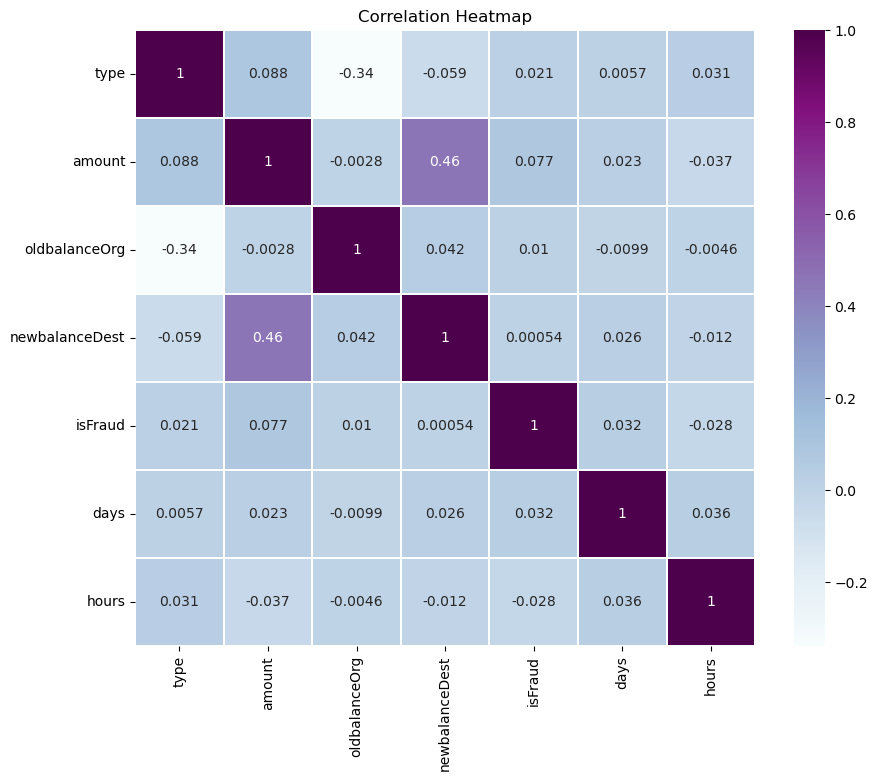

In [29]:
# correlation heatmap:
corr = df2.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, linewidths=0.1, cmap="BuPu", annot=True)
plt.title('Correlation Heatmap')
plt.show()

### Comments 
- The heatmap does not offer much information because it is a large dataset, which is why we used feature selection to assist in choosing the key characteristics. When there are many unnecessary features contributing no more helpful information than the current subset of variables, feature selection is one of the important stages in data preprocessing. It is known as a path to capture relevant features for use in the implementation of the machine learning model to expedite the training period, improve learning interpretability, and decrease model over-fitting. The dataset's excessive and verbose information may have a significant impact on the performance of our model.


Text(0.5, 1.0, 'Correlation between features')

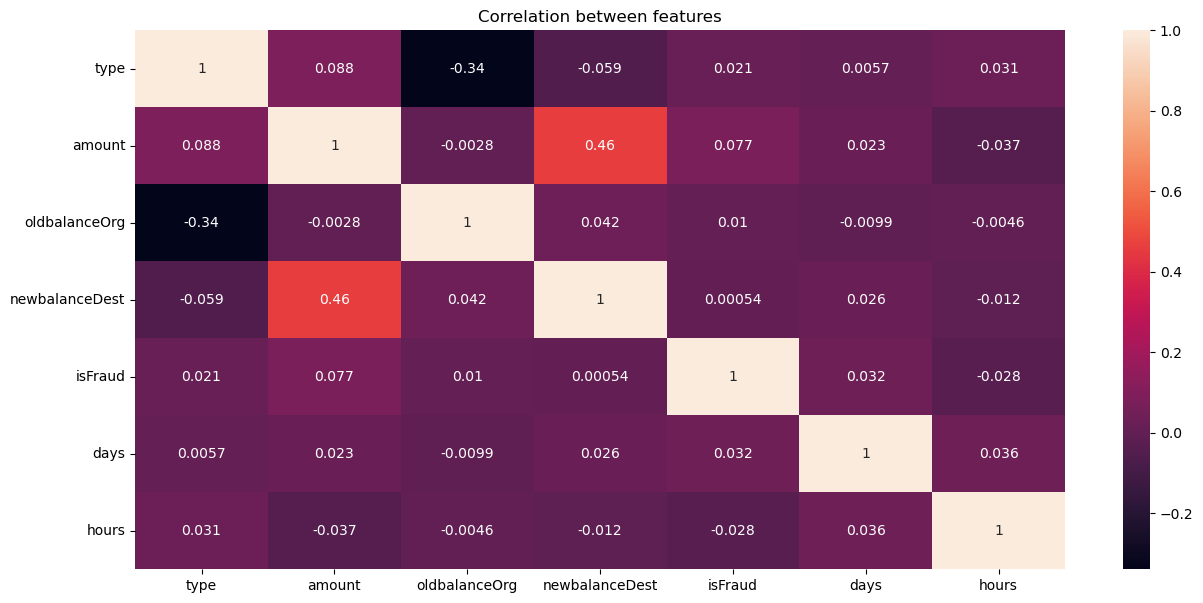

In [30]:
plt.figure(figsize=(15,7))
sns.heatmap(df2.corr(), annot=True)
plt.title("Correlation between features")

# Undersampling to handle class imbalance


In [31]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.3, random_state=0)

print("Number samples X_train dataset: ", X_train.shape)
print("Number samples y_train dataset: ", y_train.shape)
print("Number samples X_test dataset: ", X_test.shape)
print("Number samples y_test dataset: ", y_test.shape)

Number samples X_train dataset:  (4453834, 6)
Number samples y_train dataset:  (4453834,)
Number samples X_test dataset:  (1908786, 6)
Number samples y_test dataset:  (1908786,)


In [32]:
print("Before Undersampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before Undersampling, counts of label '0': {} \n".format(sum(y_train==0)))

rus = RandomUnderSampler(random_state=10)
X_train_res, y_train_res = rus.fit_resample(X_train, y_train.ravel())

print('After Undersampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After Undersampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After Undersampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After Undersampling, counts of label '0': {}".format(sum(y_train_res==0)))


Before Undersampling, counts of label '1': 5794
Before Undersampling, counts of label '0': 4448040 

After Undersampling, the shape of train_X: (11588, 6)
After Undersampling, the shape of train_y: (11588,) 

After Undersampling, counts of label '1': 5794
After Undersampling, counts of label '0': 5794


Text(0.5, 1.0, 'Correlation between synthetically created samples')

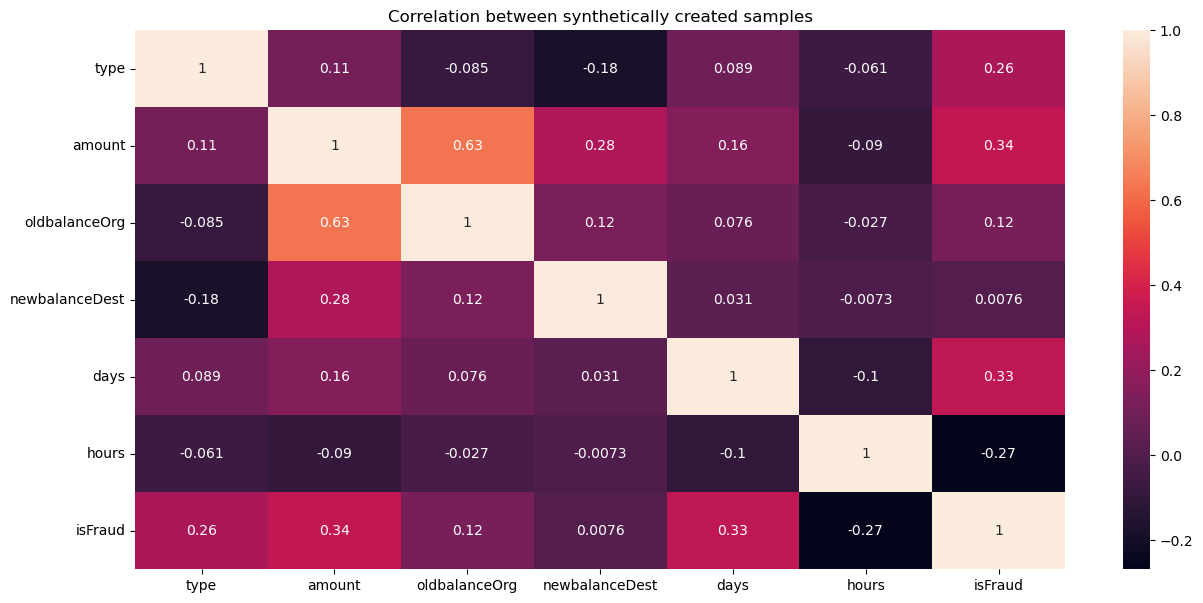

In [33]:
plt.figure(figsize=(15,7))
tdf = pd.DataFrame(X_train_res, columns=df2.drop('isFraud', axis = 1).columns)
tdf['isFraud'] = y_train_res
sns.heatmap(tdf.corr(), annot=True)
plt.title("Correlation between synthetically created samples")

### Comments
- We now have class balance for the minority class through the creation of artificial training samples, which are the following

## Feature selection Using LassoCV

Best alpha using built-in LassoCV: 316.232223
Best score using built-in LassoCV: 0.137777
Lasso picked 3 variables and eliminated the other 4 variables


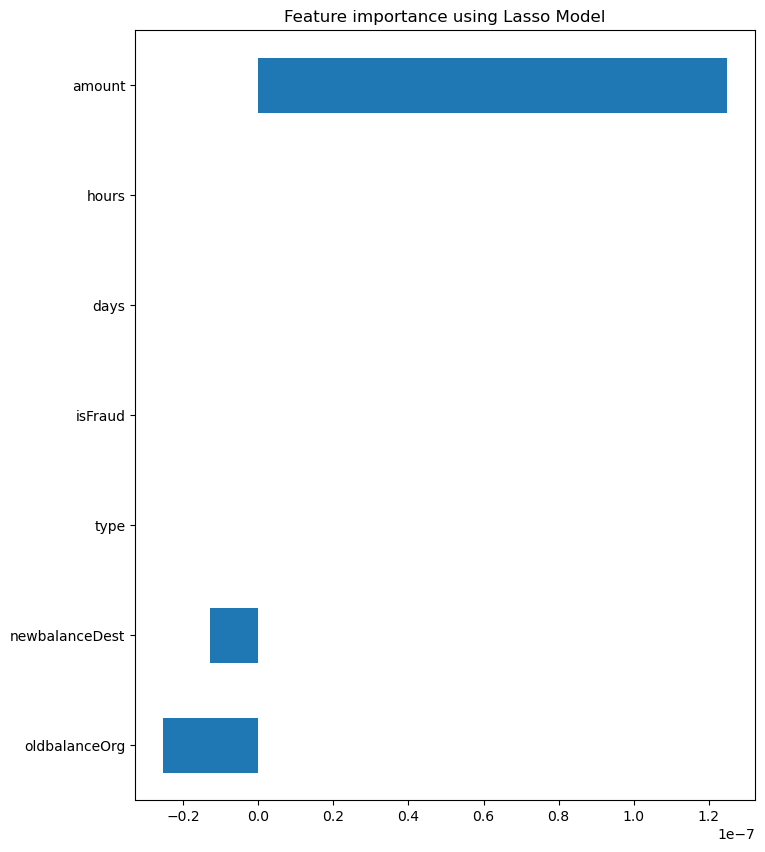

In [34]:
X_cols = ['type', 'amount', 'oldbalanceOrg', 'newbalanceDest', 'isFraud', 'days', 'hours'] 
Y_cols = 'isFraud'  

# Feature selection
x = tdf[X_cols]  # Feature Matrix
y = tdf[Y_cols]  # Target Variable

reg = LassoCV()
reg.fit(x, y)
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" % reg.score(x, y))
coef = pd.Series(reg.coef_, index=x.columns)

print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +
      str(sum(coef == 0)) + " variables")
imp_coef = coef.sort_values()
plt.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind="barh")
plt.title("Feature importance using Lasso Model")
plt.show()

In [35]:
# Assuming you have already fitted the LassoCV model and identified the important features

# Filter the dataframe to keep only the important features
important_features = coef[coef != 0].index.tolist()
selected_features = important_features[:3]  # Keep the top three important features

# Create a new dataframe with only the selected features
selected_df = tdf[selected_features].copy()  # Use .copy() to create a copy of the DataFrame

# Optionally, you can add the target variable 'isFraud' back to the dataframe if needed
selected_df['isFraud'] = tdf['isFraud']

# Now, 'selected_df' contains only the three important features and the target variable

In [36]:
tdf.columns

Index(['type', 'amount', 'oldbalanceOrg', 'newbalanceDest', 'days', 'hours',
       'isFraud'],
      dtype='object')

# Model Creation

- Define Classifiers 
- Split Data
- Create Results DataFrame

In [37]:
# Define a list of classifiers
classifiers = [
    ("Random Forest", RandomForestClassifier()),
    ("Gradient Boosting", GradientBoostingClassifier()),
    ("AdaBoost", AdaBoostClassifier()),
    ("Logistic Regression", LogisticRegression()),
    ("SVM", SVC(probability=True)),
    ("KNN", KNeighborsClassifier()),
    ("Naive Bayes", GaussianNB()),
    ("Decision Tree", DecisionTreeClassifier()),
    ("XGBoost", XGBClassifier()),
    ("LightGBM", LGBMClassifier())
]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(selected_df.drop('isFraud', axis=1), selected_df['isFraud'], test_size=0.3, random_state=0)

# Create a DataFrame to store the results
results = []

# Iterate Over Classifiers and Calculate Metrics

In [38]:
# Iterate over classifiers
for name, clf in classifiers:
    clf.fit(X_train, y_train)  
    y_pred = clf.predict(X_test)  
    
    # Calculate classification metrics
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    # Calculate ROC curve and AUC
    if hasattr(clf, "predict_proba"):
        y_pred_prob = clf.predict_proba(X_test)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
        roc_auc = auc(fpr, tpr)
    else:
        roc_auc = None
    
    # Create a classification report
    report = classification_report(y_test, y_pred, output_dict=True)
    
    # Print classification report
    print(f"Classifier: {name}")
    print(f"Accuracy: {accuracy}")
    print(f"F1 Score: {f1}")
    print(f"AUC-ROC: {roc_auc}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print("=" * 50)
    
    # Append results to the DataFrame
    results.append({
        "Classifier": name,
        "Accuracy": accuracy,
        "F1 Score": f1,
        "AUC-ROC": roc_auc,
        "Class 0 Precision": report['0']['precision'],
        "Class 0 Recall": report['0']['recall'],
        "Class 1 Precision": report['1']['precision'],
        "Class 1 Recall": report['1']['recall']
    })

Classifier: Random Forest
Accuracy: 0.9769916594765603
F1 Score: 0.9776411403018447
AUC-ROC: 0.9961477992625593
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      1705
           1       0.97      0.99      0.98      1772

    accuracy                           0.98      3477
   macro avg       0.98      0.98      0.98      3477
weighted avg       0.98      0.98      0.98      3477

Classifier: Gradient Boosting
Accuracy: 0.9548461317227495
F1 Score: 0.9563282336578581
AUC-ROC: 0.9882641679299367
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.94      0.95      1705
           1       0.94      0.97      0.96      1772

    accuracy                           0.95      3477
   macro avg       0.96      0.95      0.95      3477
weighted avg       0.96      0.95      0.95      3477

Classifier: AdaBoost
Accuracy: 0.8380788035662928
F1 Score: 0.8422527318

# Visualize Comparative Metrics

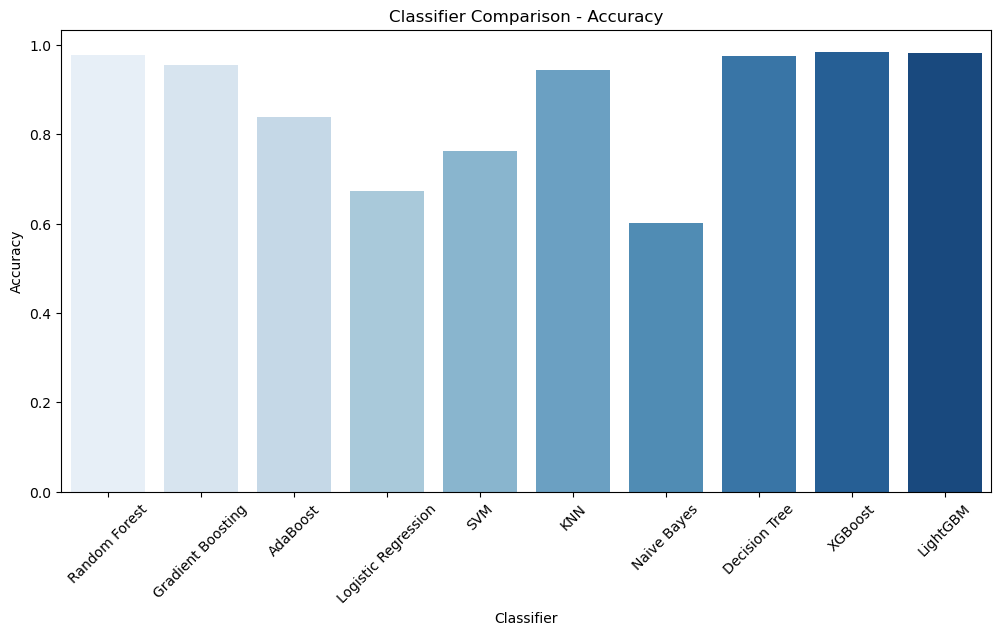

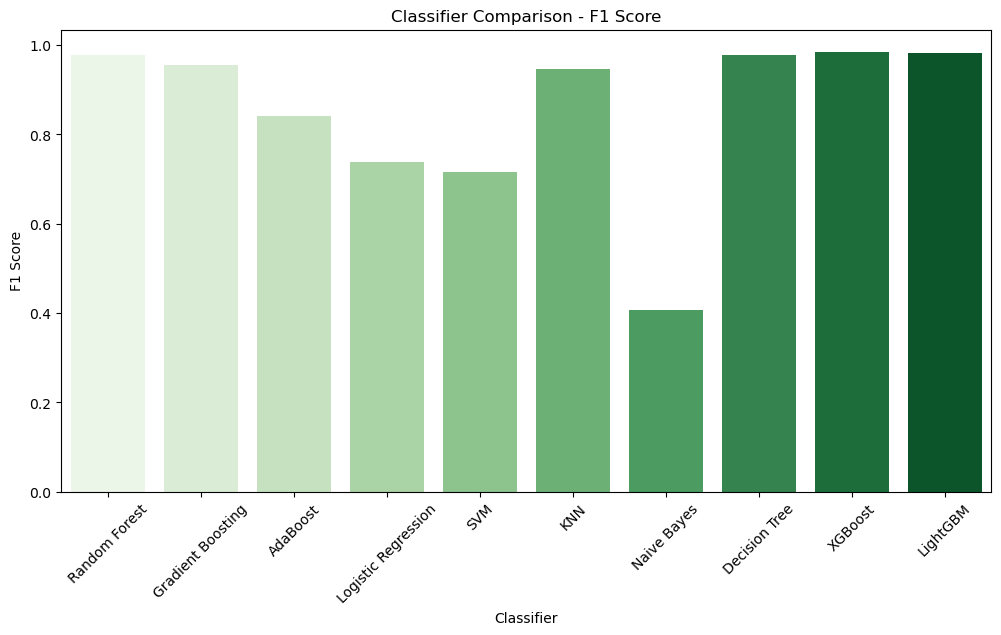

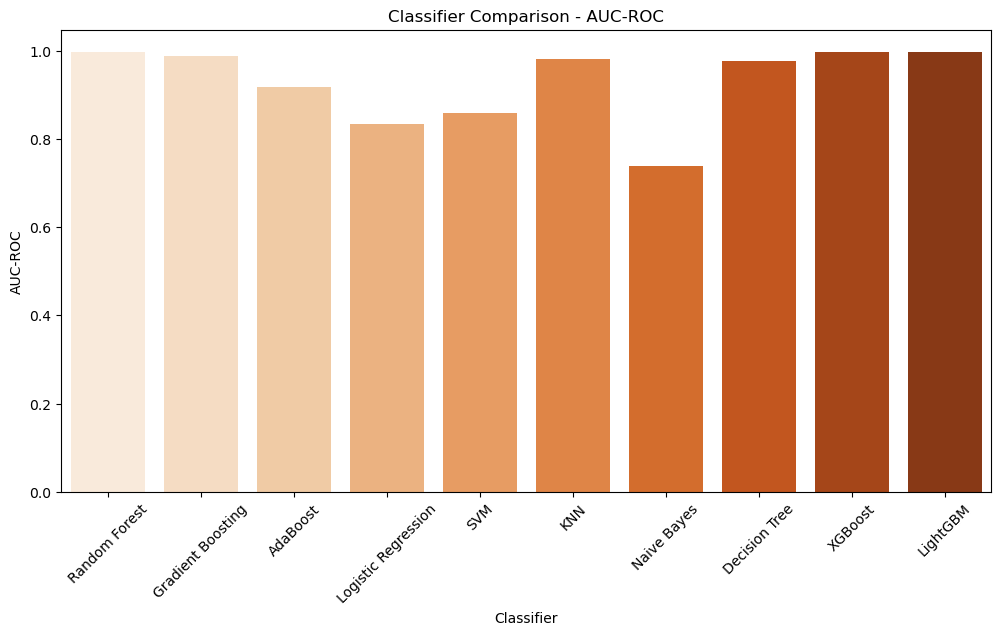

In [39]:
# Convert results to a DataFrame for visualization
results_df = pd.DataFrame(results)

# Plot comparative metrics
plt.figure(figsize=(12, 6))
sns.barplot(x="Classifier", y="Accuracy", data=results_df, palette="Blues")
plt.title("Classifier Comparison - Accuracy")
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x="Classifier", y="F1 Score", data=results_df, palette="Greens")
plt.title("Classifier Comparison - F1 Score")
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x="Classifier", y="AUC-ROC", data=results_df, palette="Oranges")
plt.title("Classifier Comparison - AUC-ROC")
plt.xticks(rotation=45)
plt.show()